<a href="https://colab.research.google.com/github/ElgunBabayev1/Deep-Learning/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-09-11 12:07:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.2MB/s    in 3.2s    

2024-09-11 12:07:43 (32.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref=zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


In [ ]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
for item in data_dir.glob('*'):
  print(item,' ',item.name)

pizza_steak/train/pizza   pizza
pizza_steak/train/steak   steak


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (289, 512, 3)


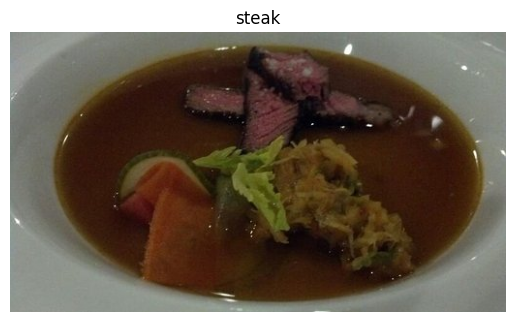

In [ ]:
img=view_random_image(target_dir='pizza_steak/train/',target_class='steak')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           strides=1,
                           padding='same',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='linear')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history=model_1.fit(train_data,
                    epochs=5,
                    validation_data=valid_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - accuracy: 0.5095 - loss: 0.8416 - val_accuracy: 0.6080 - val_loss: 0.5852
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.6560 - loss: 0.5540 - val_accuracy: 0.7740 - val_loss: 0.4684
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.7906 - loss: 0.4469 - val_accuracy: 0.7880 - val_loss: 0.3950
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8299 - loss: 0.3741 - val_accuracy: 0.7640 - val_loss: 0.4316
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.8299 - loss: 0.3633 - val_accuracy: 0.8680 - val_loss: 0.3209


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 107, 107, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(train_data,
                    epochs=5,
                    validation_data=valid_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.4657 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5171 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model_3.fit(train_data,
            epochs=5,
            validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.6820 - loss: 0.6154 - val_accuracy: 0.7340 - val_loss: 0.5101
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7770 - loss: 0.4939 - val_accuracy: 0.7680 - val_loss: 0.4668
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7890 - loss: 0.4759 - val_accuracy: 0.7780 - val_loss: 0.4480
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7935 - loss: 0.4601 - val_accuracy: 0.7900 - val_loss: 0.4266
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8002 - loss: 0.4354 - val_accuracy: 0.8000 - val_loss: 0.4279


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)

In [ ]:
len(images),len(labels)

(32, 32)

In [ ]:
labels[0]

0.0

In [ ]:
from tensorflow.keras.optimizers import Adam,AdamW
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
tf.random.set_seed(42)
model_4=Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    Conv2D(filters=100,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu'),
    Conv2D(100,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(100,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy']
)

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1166400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │       1,166,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349,401 (5.15 MB)

 Trainable params: 1,349,401 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5454 - loss: 1.4804 - val_accuracy: 0.8040 - val_loss: 0.4567
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 327ms/step - accuracy: 0.7832 - loss: 0.4687 - val_accuracy: 0.8200 - val_loss: 0.4044
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - accuracy: 0.8202 - loss: 0.4410 - val_accuracy: 0.8420 - val_loss: 0.3460
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.8286 - loss: 0.3917 - val_accuracy: 0.8540 - val_loss: 0.3553
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.8321 - loss: 0.3463 - val_accuracy: 0.8620 - val_loss: 0.3298


In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8539 - loss: 0.3552


[0.3298068642616272, 0.8619999885559082]

In [ ]:
history_4.history

{'accuracy': [0.6453333497047424,
  0.7733333110809326,
  0.8186666369438171,
  0.828000009059906,
  0.8519999980926514],
 'loss': [0.8914523720741272,
  0.4845938980579376,
  0.4275467097759247,
  0.39049726724624634,
  0.33956342935562134],
 'val_accuracy': [0.8040000200271606,
  0.8199999928474426,
  0.8420000076293945,
  0.8539999723434448,
  0.8619999885559082],
 'val_loss': [0.4566654860973358,
  0.4043760895729065,
  0.34595945477485657,
  0.35532161593437195,
  0.3298068344593048]}

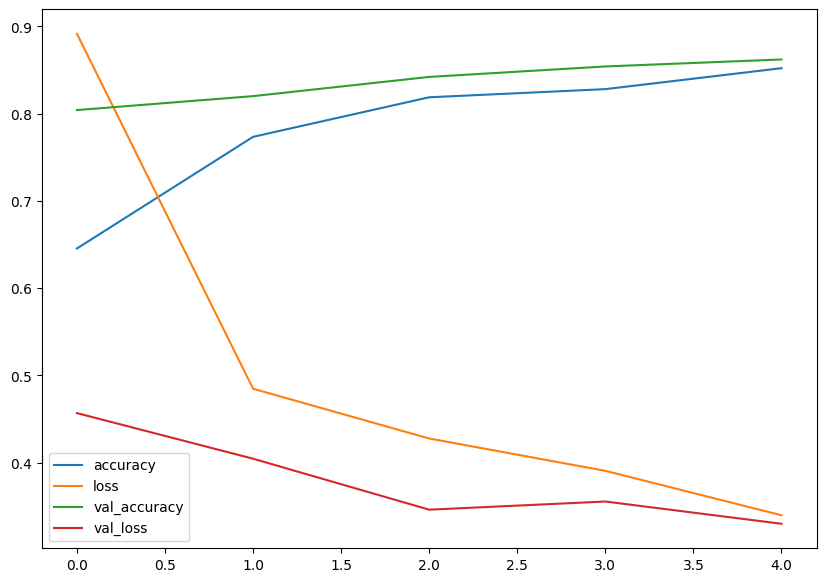

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

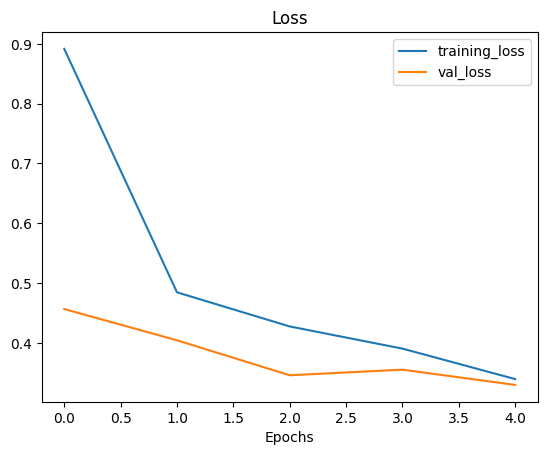

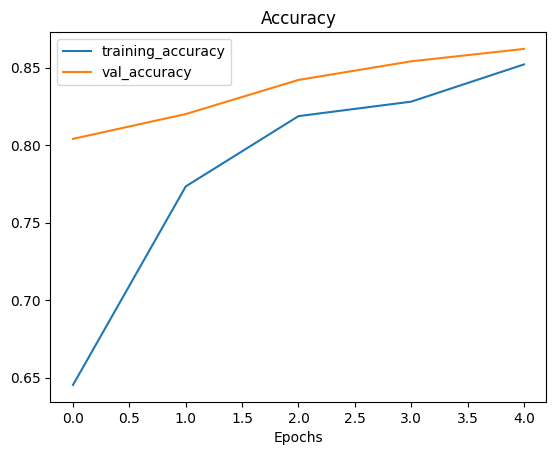

In [ ]:
plot_loss_curves(history_4)

In [ ]:
from tensorflow import keras

tf.random.set_seed(42)
model_4=Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    Conv2D(filters=100,
           kernel_size=4,
           strides=5,
           padding='valid',
           activation='relu'),
    Conv2D(100,3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    MaxPool2D(pool_size=2),
    Conv2D(100,3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=AdamW(learning_rate=0.0008),
                metrics=['accuracy']
)

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.6275 - loss: 0.6341 - val_accuracy: 0.7660 - val_loss: 0.4913
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.7884 - loss: 0.4768 - val_accuracy: 0.8560 - val_loss: 0.3793
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7879 - loss: 0.4736 - val_accuracy: 0.8100 - val_loss: 0.3985
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8416 - loss: 0.3831 - val_accuracy: 0.8540 - val_loss: 0.4071
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8241 - loss: 0.4068 - val_accuracy: 0.8500 - val_loss: 0.3640


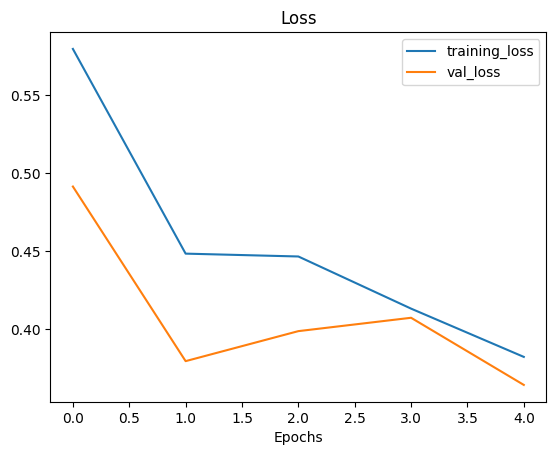

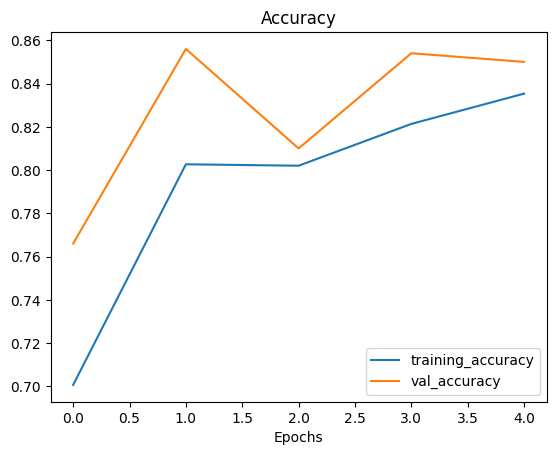

In [ ]:
plot_loss_curves(history_4)

In [ ]:
#Augamented dataset
train_datagen_augamented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Normal dataset
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Train data augamented:")
IMG_SIZE=(224,224)
train_data_augamented=train_datagen_augamented.flow_from_directory(directory=train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=False)

print("Non-augamented train data:")
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=False)

print("Non-augamented test data:")
test_data=test_datagen.flow_from_directory(directory=train_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32,
                                           shuffle=False)

Train data augamented:
Found 1500 images belonging to 2 classes.
Non-augamented train data:
Found 1500 images belonging to 2 classes.
Non-augamented test data:
Found 1500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)

augamented_images,augamented_labels=next(train_data_augamented)

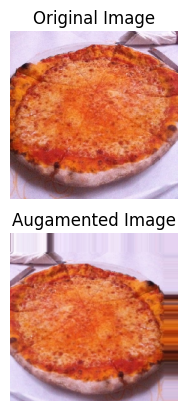

In [ ]:
import random
random_number=random.randint(1,31)
plt.subplot(2,1,1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.subplot(2,1,2)
plt.imshow(augamented_images[random_number])
plt.title('Augamented Image')
plt.axis(False);

In [ ]:
model_6=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_6=model_6.fit(train_data_augamented,epochs=5,validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.5441 - loss: 0.7505

In [ ]:
print('Augamented and Shuffled train data')
train_data_augamented_and_shuffled = train_datagen_augamented.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary'
)

In [ ]:
model_8=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_8=model_8.fit(train_data_augamented_and_shuffled,epochs=5,validation_data=test_data)

In [ ]:
plot_loss_curves(history_8)